# Prediction of features of ligands


---

## Summary

- Test prediction with rdkit data
    - Projection and regression
- Prediction of feature with our database of ligand

    Some test to predict different parameters

    - Regression with our list of feature
    - Projection with our list of feature

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import choice
from numpy import column_stack
import numpy as np
import gzip
import time
from sklearn import metrics
from molzip_adapted import regression_one, regression, projection

In [ ]:
# Path of data directory
path_data_directory = "../data/"

# Test prediction with rdkit data

## Projection and regression
We have 1128 ligands in this data and we use all of it to train and after we predict the solubility of these ligands.

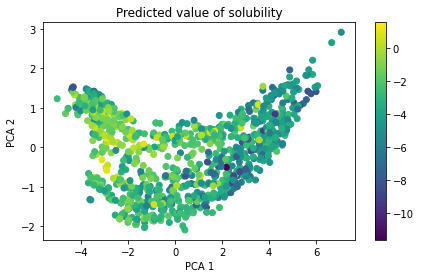

In [ ]:
# prepare the data
df = pd.read_csv(path_data_directory+"test_feat.csv")
smiles, sol_val = df['SMILES'], df['Solubility'].values

proj = projection(smiles)

fig, ax = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(7)
color = ax.scatter(proj[:, 0], proj[:, 1], c=sol_val)
fig.colorbar(color)
plt.title("Predicted value of solubility")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

/var/folders/4t/33n9r2m945jf495b5pqr6d5m0000gn/T/ipykernel_21011/1184141953.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  return np.matmul(top_k_dists, top_k_values) * (1./sum_dist)
/var/folders/4t/33n9r2m945jf495b5pqr6d5m0000gn/T/ipykernel_21011/1184141953.py:66: RuntimeWarning: invalid value encountered in double_scalars
  return np.matmul(top_k_dists, top_k_values) * (1./sum_dist)


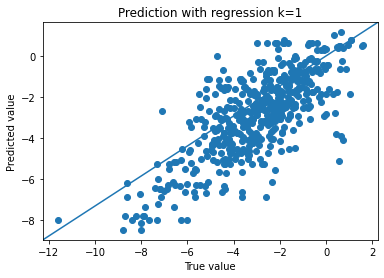

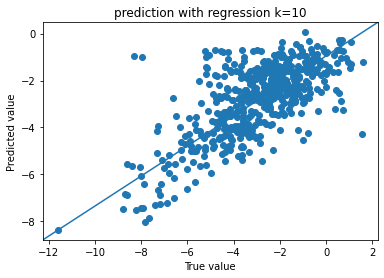

In [ ]:
# prepare the data, training and validation of rdkit
df = pd.read_csv(path_data_directory+"test_feat.csv")

smiles, sol_val = df['SMILES'], df['Solubility'].values
train_id = choice(range(df.shape[0]), int(df.shape[0]*0.8))
val_id = [i for i in range(df.shape[0]) if i not in train_id]
train_smiles, train_sol = smiles[train_id], sol_val[train_id]
val_smiles, val_sol = smiles[val_id], sol_val[val_id]

pred1 = regression(val_smiles, train_smiles, train_sol, k=1)
pred10 = regression(val_smiles, train_smiles, train_sol, k=10)

fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
plt.scatter(val_sol, pred1)
plt.title("Prediction with regression k=1")
plt.xlabel("True value")
plt.ylabel("Predicted value")
plt.show()

fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], transform=ax.transAxes)
plt.scatter(val_sol, pred10)
plt.title("prediction with regression k=10")
plt.xlabel("True value")
plt.ylabel("Predicted value")
plt.show()

# Prediction of feature with our database of ligand

In [ ]:
# Data of ligands from teachers
path_data_all = path_data_directory+"pilot_library.csv"
data_all = pd.read_csv(path_data_all)
smiles_test, lopg_test= data_all["smiles"], data_all["logp"]
data_all[:5]

,eos,smiles,inchi,inchikey,formula,mw,hba,hbd,tpsa,rb,fp3,logp,violates_ro5,pubchem,chembl,zinc
0,EOS1,COc1ccc(N2C(=O)NC(CC(=O)N3CCC(c4ccccc4)CC3)C2=...,InChI=1S/C23H25N3O4/c1-30-19-9-7-18(8-10-19)26...,BDSKOWUCRDTSBA-UHFFFAOYSA-N,C23H25N3O4,407.470001,7,1,78.949997,5,0.347826,2.91630,0,CID91820963,NaN,NaN
1,EOS2,COc1cc2ncn(CCC(=O)NCc3cccc(F)c3)c(=O)c2cc1OC,InChI=1S/C20H20FN3O4/c1-27-17-9-15-16(10-18(17...,BBHNGOSSYMSMBL-UHFFFAOYSA-N,C20H20FN3O4,385.394989,7,1,82.449997,7,0.250000,2.25930,0,CID39351211,NaN,ZINC000032103955
2,EOS3,O=C(C1CCCCC12OCCO2)N1CCOC(c2ccccc2)C1,InChI=1S/C19H25NO4/c21-18(16-8-4-5-9-19(16)23-...,FDNIQBQHPFKADZ-UHFFFAOYSA-N,C19H25NO4,331.411987,5,0,48.000000,2,0.631579,2.51980,0,CID118986097,NaN,NaN
3,EOS4,O=C(CCCC(=O)N1CCOC(c2ccccc2)C1)N1CCOC(c2ccccc2)C1,InChI=1S/C25H30N2O4/c28-24(26-14-16-30-22(18-2...,ACLWFALTINVVJH-UHFFFAOYSA-N,C25H30N2O4,422.524994,6,0,59.080002,6,0.440000,3.35690,0,CID118986099,NaN,NaN
4,EOS5,CC[C@@H](C)[C@@H](CO)NC(=O)Cc1c(C)c2ccc(O)cc2o...,InChI=1S/C18H23NO5/c1-4-10(2)15(9-20)19-17(22)...,WSIYPOIJJLVUDP-MEBBXXQBSA-N,C18H23NO5,333.384003,6,3,99.769997,6,0.444444,1.87272,0,CID91637070,NaN,ZINC000217689925


Some test to predict different parameters

With the data from teachers, where there are lot data of different features

We want to test molzip and see if it predict well

In [ ]:
# List of features that we want to predict (continuous values)
liste_features = ["mw","tpsa","fp3","logp"]

nb_data = len(data_all)
print("Number of ligands in this data :", nb_data)

Number of ligands in this data : 5016


## Regression with our list of feature

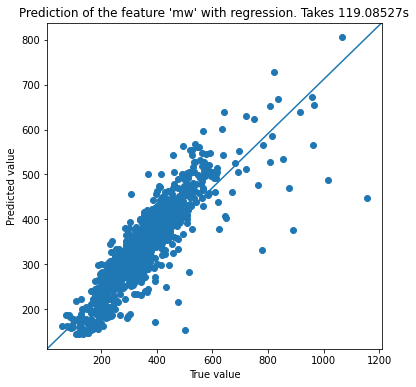

Score:  5235.004339935886


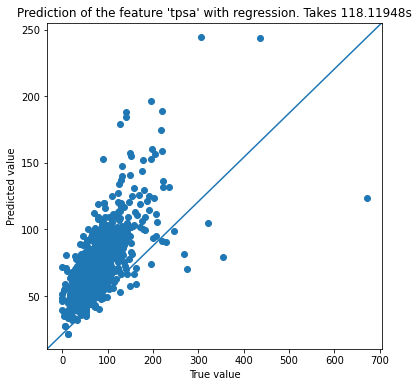

Score:  1275.8928970200996


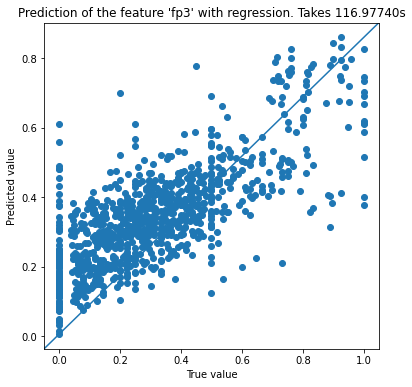

Score:  0.02528504231958082


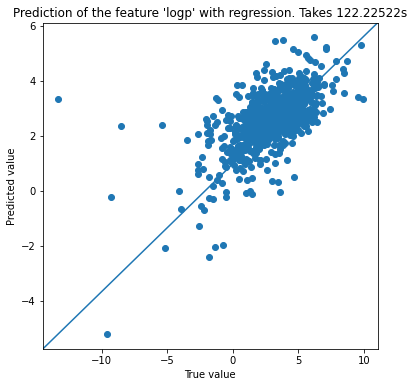

Score:  2.972434049426631


In [ ]:
liste_features = ["mw","tpsa","fp3","logp"]
# Pourcent of train data 0.8
# Data smiles, don't change during every regression
x_test = data_all["smiles"][int(nb_data*0.8):]
x_train = data_all["smiles"][:int(nb_data*0.8)]

for feature in liste_features :
    # Take the different features
    y_test = data_all[feature][int(nb_data*0.8):]
    y_train = data_all[feature][:int(nb_data*0.8)]

    # Do the regression
    start_time = time.time()
    pred = regression(x_test, x_train, y_train, k=10)
    end_time = time.time()
    T = end_time-start_time

    # Plot
    fig, ax = plt.subplots()
    fig.set_figheight(6)
    fig.set_figwidth(6)
    plt.plot([0, 1], [0, 1], transform=ax.transAxes)
    plt.scatter(y_test, pred)
    plt.title("Prediction of the feature '%s' with regression. Takes %.5fs"%(feature,T))
    plt.xlabel("True value")
    plt.ylabel("Predicted value")
    plt.show()
    print("Score: ",metrics.mean_squared_error(y_test,pred))

## Projection with our list of feature

There, we use k=10 and that we reduce with ACP to 2 components

We didn't give the features for the train

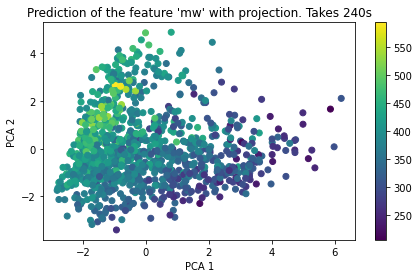

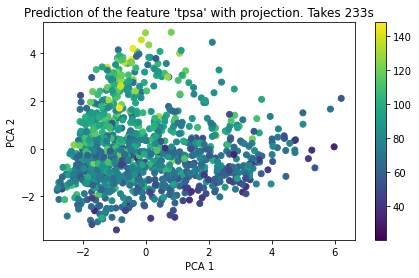

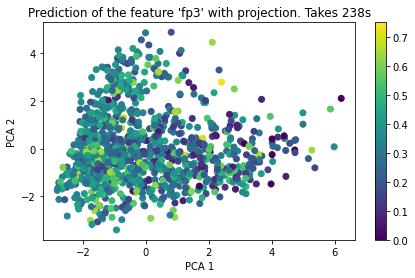

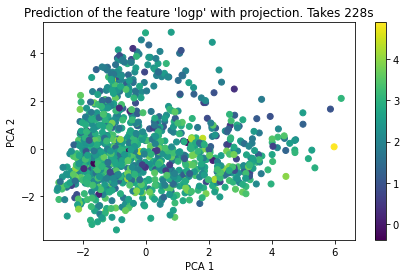

In [ ]:
# Pourcent of train data 0.8
train_id = choice(range(nb_data), int(nb_data*0.8))
test_id = [i for i in range(nb_data) if i not in train_id]

# Data smiles, don't change during every regression
x_test = data_all["smiles"][test_id]
x_train = data_all["smiles"][train_id]

for feature in liste_features :
    # Take the different features
    y_test = data_all[feature][test_id]

    # Do the regression
    start_time = time.time()
    proj = projection(x_test, x_train)
    end_time = time.time()
    T = end_time-start_time

    # Plot
    fig, ax = plt.subplots()
    fig.set_figheight(4)
    fig.set_figwidth(7)
    color = ax.scatter(proj[:, 0], proj[:, 1], c=y_test)
    fig.colorbar(color)
    plt.title("Prediction of the feature '%s' with projection. Takes %.0fs"%(feature,T))
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()